# Coursera Applied Plotting, Charting and Data Representation in Python
## Assignment 4



Identify two publicly accessible datasets from the same region that are consistent across a meaningful dimension

State a research question that can be answered using two publicly accessible datasets

Create a visual using matplotlib that addresses your stated research question

Justify how the visual addresses your research question


## Investigating trends in NZ road injuries

Motor vehicle accidents are a major cause of death and disability around the world. As a result, excellent statistics are available to understand trends and causitive factors in changing accident rates.

I chose to investigate the topic of 'Motor vehicle accidents', in the region of 'New Zealand'. The research question was 'Are changes in open road driving speed affecting the road accident rate in New Zealand?'

I took data on motor injury rates from a larger collection of general serious injury data produced by StatsNZ:
https://www.stats.govt.nz/assets/Uploads/Serious-injury-outcome-indicators/Serious-injury-outcome-indicators-2000-16/Download-data/Serious-injury-outcome-indicators-2000-16-csv-tables.zip

I then compared this with survey data which sampled open road speeds from selected sites around NZ
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjhqtfn_rfbAhUoAsAKHa-4DmEQFggnMAA&url=https%3A%2F%2Fwww.transport.govt.nz%2Fassets%2FUploads%2FResearch%2FDocuments%2FMotor-Vehicle-Crashes-2016%2FCompliance-2016.xlsx&usg=AOvVaw1uoBBsBQgknliK5LwAKgiT

The visual clearly shows that NZ roads have become safer over the period for which data was available (2000-2016). There was a long term decrease in the serious injury rate up until 2013; however it appears to be trending up in 2015-2016. Open road speeds correlate with the long term decrease and it is plausible that decreasing speed has played a role in the falling injury rate. However, at only 6% the decline in speed has been modest so is unlikely to fully explain the much larger change in injury rate. The recent uptick in injuries also suggests that other factors are important.



In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib notebook

In [2]:
attitudes = pd.read_excel('Compliance-2016.xlsx', sheetname='open road speed', index_col=None)
attitudes.reset_index(inplace = True)
accidents = pd.read_csv('sioi-2000-16-machine-readable-csv.csv')

In [3]:
speed_mean = attitudes.iloc[17][6:23]
speed_85 = attitudes.iloc[38][6:23]
years = attitudes.iloc[2][6:23]

In [5]:
# Serious is fatal & non-fatal combined but doesn't include preliminary 2016 data
# Filtering to explore the dataset

crashes= accidents[(accidents['Units']== 'Per 100,000 people') 
                    & (accidents['Cause'] == 'Motor vehicle traffic crashes')
                    & (accidents['Type']== 'Single year')
                    & (accidents['Validation']== 'Validated')
                    & (accidents['Population']== 'Whole pop')]

In [7]:
fatal = accidents[accidents['Series_reference'] == 'W_M16']
serious_nf = crashes[crashes['Series_reference'] == 'W_M02'] # excludes fatal
serious_total = np.array(fatal['Data_value']) + np.array(serious_nf['Data_value'])


In [8]:
# Need to make right-hand axis
# Consider sourcing the police per capita stats?

In [165]:
injuryChange = (serious_total.max()-serious_total.min())*100/serious_total.max()
speedChange = (speed_mean.max()-speed_mean.min())*100/speed_mean.max()

<IPython.core.display.Javascript object>


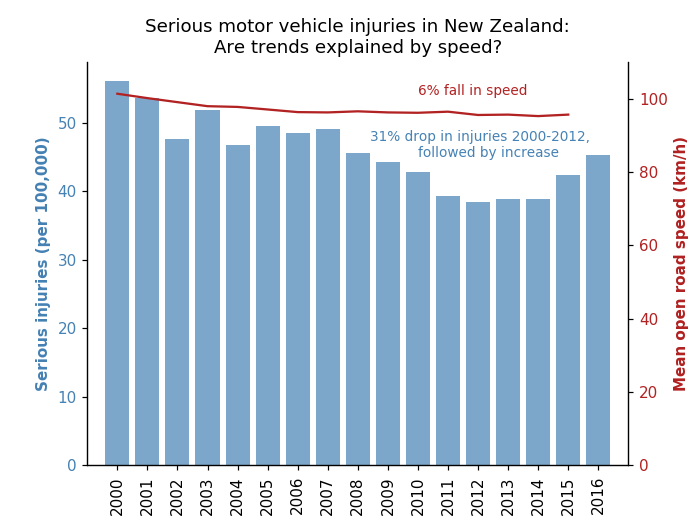

In [203]:
years = fatal['Period']


fig, ax1 = plt.subplots()
plt.title('Serious motor vehicle injuries in New Zealand:\nAre trends explained by speed?')
plt.xticks(rotation=90)
ax1.spines['top'].set_visible(False)

ax2 = ax1.twinx()
speed_mean.plot(color='firebrick')
ax2.set_ylabel('Mean open road speed (km/h)', color = 'firebrick', weight='bold')
plt.xticks(rotation=90)

#ax1.scatter(x=serious_nf['Period'], y=serious_nf['Data_value'], s=fatal['Data_value']*20, )
ax1.bar(x=years[0:17], height=serious_total[0:17], color='steelblue', alpha=0.7)
#ax1.errorbar(yerr=)

ax1.set_ylabel('Serious injuries (per 100,000)', color='steelblue', weight='bold')
ax1.set_xlabel('year')
#plt.ylim(0,120)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

for t in ax1.yaxis.get_ticklabels(): t.set_color('steelblue')
for t in ax2.yaxis.get_ticklabels(): t.set_color('firebrick')

ax1.text(10, 54, '%1.0f%% fall in speed' %speedChange, fontsize=9, color='firebrick', alpha=1)
ax1.text(8.4, 45, '%1.0f%% drop in injuries 2000-2012,\n           followed by increase'%injuryChange, fontsize=9, color='steelblue', alpha=1)

plt.xlim(-1, 17)
plt.ylim(0,110)

plt.savefig('RoadInjuries.png', dpi=600)
plt.show()